<a href="https://colab.research.google.com/github/Julianqll/caloriesCalculatorNN/blob/main/caloriesCalculatorNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Embedding, Input, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Concatenate, Dense

In [ ]:
alturas = np.array([167.05, 191.54, 172.14, 182.41, 183.14, 189.58, 191.96, 183.24, 192.54, 182.51, 163.28, 150.66, 153.89, 195.03, 193.09, 161.09, 172.27, 182.34, 158.1, 190.45, 189.28, 173.74, 161.75, 173.04, 192.64, 161.39, 163.17, 176.69, 189.63, 181.08, 189.42, 175.04, 165.81, 159.33, 164.26, 154.27, 160.07, 152.73, 158.62, 174.28, 160.29, 192.45, 163.0, 196.52, 185.91, 175.57, 163.11, 186.02, 178.66, 153.45], dtype=float)
pesos = np.array([91.99, 55.17, 81.36, 97.39, 68.62, 77.54, 79.61, 58.8, 96.15, 80.14, 86.96, 56.8, 82.27, 91.68, 66.87, 65.34, 50.33, 61.25, 57.79, 96.29, 96.26, 95.41, 89.16, 80.12, 99.24, 58.32, 74.45, 82.01, 60.46, 68.14, 99.89, 53.85, 57.39, 68.72, 71.27, 59.92, 84.15, 56.6, 71.51, 82.69, 74.35, 77.15, 67.5, 97.63, 54.58, 81.23, 95.48, 91.75, 78.4, 86.91] , dtype=float)
edades = np.array([18, 19, 36, 46, 39, 37, 49, 47, 50, 43, 27, 47, 21, 46, 23, 18, 50, 48, 48, 18, 33, 31, 39, 41, 29, 25, 20, 49, 23, 41, 49, 36, 29, 35, 18, 33, 25, 43, 25, 47, 41, 29, 28, 46, 25, 35, 42, 19, 26, 23] , dtype=int)
sexos = np.array([1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1], dtype=int)
nivelesActividad = ([4, 4, 1, 0, 2, 2, 1, 1, 5, 0, 3, 5, 1, 3, 3, 4, 1, 5, 1, 5, 5, 1, 3, 1, 4, 5, 1, 2, 5, 4, 5, 2, 1, 1, 2, 1, 3, 2, 2, 1, 2, 0, 3, 5, 4, 0, 2, 2, 2, 2] ,dtype=int)
calorias = ([3425.925, 2985.65, 2167.865, 2266.755, 2359.7200000000003, 2582.84, 2458.1899999999996, 1872.1499999999999, 4415.7125, 2078.505, 2789.6749999999997, 2943.1375, 2125.9174999999996, 3343.7906250000005, 2799.146875, 3150.425, 1636.5824999999998, 3489.3875, 1631.035, 4375.08875, 4185.079999999999, 2413.5649999999996, 2996.9406249999997, 2355.7799999999997, 3780.8, 3003.5412499999993, 2337.0375, 2695.06, 3481.7112499999994, 3226.3, 4086.5825, 2332.0, 2058.2975, 2118.2175, 2646.92, 1732.3425000000002, 3013.390625, 2096.9, 2272.7599999999998, 2360.61, 2206.9, 2201.1749999999997, 2437.3125, 4552.965, 2843.475, 1888.335, 2830.7800000000007, 2918.6000000000004, 2575.4, 2483.46], dtype=float)

In [ ]:
# Create an Input for each team
pesos_in = Input(shape=(1, ))
alturas_in = Input(shape=(1, ))
edades_in = Input(shape=(1, ))


# Combine the team strengths with the home input using a Concatenate layer,
# then add a Dense layer

out = Concatenate()([pesos_in, alturas_in, edades_in])
out = Dense(1)(out)

In [ ]:
#input_tensor = Input(shape=(3, ))
#
## Pass it to a Dense layer with 1 unit
#output_tensor = Dense(1)(input_tensor)
#
## Create a model
#modelo = Model(input_tensor, output_tensor)

modelo = Model([pesos_in, alturas_in, edades_in], out)

modelo.compile(
    optimizer = tf.keras.optimizers.Adam(0.1),
    loss = 'mean_squared_error'
)

In [ ]:
print("Comenzando entrenamiento...")
historial = modelo.fit([pesos, alturas, edades], calorias, epochs=1000, verbose=False)
print("Entrenamiento finalizado")

Comenzando entrenamiento...
Entrenamiento finalizado


In [ ]:
#oculta1 = tf.keras.layers.Dense(units=3, input_shape=[3])
#oculta2 = tf.keras.layers.Dense(units=3)
#oculta3 = tf.keras.layers.Dense(units=3)
#salida = tf.keras.layers.Dense(units=1)
#
#modelo = tf.keras.Sequential([oculta1, oculta2, oculta3, salida])

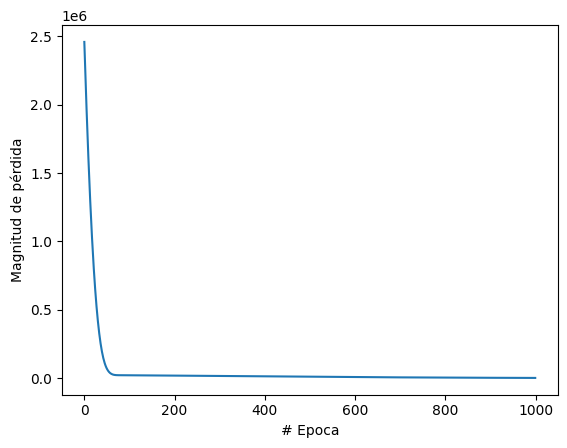

In [ ]:
import matplotlib.pyplot as plt
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial.history["loss"])

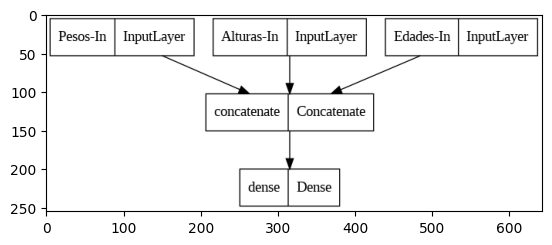

In [ ]:
from tensorflow.keras.utils import plot_model

# Plot model
plot_model(modelo, to_file='./team_strength_model.png')

# Display the image
data = plt.imread('./team_strength_model.png')
plt.imshow(data);

In [ ]:
pesos = np.array([[peso]])
alturas = np.array([[altura]])
edades = np.array([[edad]])

# Make the prediction
prediccion = modelo.predict([pesos, alturas, edades])
print(prediccion)

1/1 [==============================] - 0s 99ms/step
[[1473.2086]]
